# Using MonoTools.lightcurve

The `fit` and `search` modules take in, as default, `lightcurve.lc` objects. Here we'll give a very quick overview of how to use them.

The simplest way to use a `lightcurve` object, is simply to load externally your data, and make a lightcurve object from them, by passing `time`, `flux` and `flux_err` arrays.

First let's import the module and other useful stuff:

In [2]:
%load_ext autoreload
%autoreload 2
from MonoTools import lightcurve as lc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Matplotlib created a temporary config/cache directory at /var/folders/p0/tmr0j01x4jb3qrbc5b0gnxcw0000gn/T/matplotlib-hjf_395y because the default path (/Users/hosborn/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## Loading a TESS, K2 or Kepler lightcurve

The easiest way to use `MonoTools.lightcurve` is to not bother with the `load_lc` function defined below, but instead to jump straight to extracting a `multilc` class from a search of Kepler, K2 and TESS data.

This is possible simply by passing an `id` and `mission` argument to the `multilc` class.

It will search the given mission, but if `do_search` is True, it will also search other missions for corresponding data using the `multilc.get_all_lightcurves()` function. This function is assisted by including a radec in `astropy.coordinates.SkyCoord` format as an argument when initialising the `multilc` class (as otherwise, we have to access the input catalogue and then use the ra & dec to search for extra data).

Set `load=False` if you do not want to load from file.

### TESS Example: Nu2 Lupi


In [3]:
tesslc=lc.multilc(136916387, 'tess')

Getting all IDs


If other missions have been searched, the info should end up in `multilc.all_ids`.

You can see that the TESS input catalog has been searched and stored at `tesslc.all_ids['tess']['data']`, which is useful.

In [13]:
#In this case there are no extra lightcurves from e.g. Kepler, K2 or CoRoT:
tesslc.all_ids

{'tess': {'id': 136916387,
  'data': ID            136916387
  ra            230.45063
  dec          -48.317628
  pmRA           -1624.05
  pmDEC          -276.024
                  ...    
  e_RA_orig      0.068131
  e_Dec_orig     0.057039
  raddflag              1
  wdflag                0
  dstArcSec           0.0
  Name: 0, Length: 125, dtype: object,
  'search': [12, 38]},
 'k2': {},
 'kepler': {},
 'corot': {}}

## Plotting

Now you have a lightcurve, then you can plot using `lc.plot()`. For high-cadence data (<30 minutes), it will perform  binning and plot these are stronger points. 

Useful arguments include:
- `plot_rows`  How many rows would you like to split the data over?
- `timeseries`: If you want to plot more than just `flux`, then include those timeseries here (e.g. `bg_flux`, `raw_flux`, `flux_flat` etc). These other timeseries can be offset using the `y_offset` argument
- `ylim` and `xlim`: If you don't want to plot the whole x or y span, then cut them here.
- `plot_ephem`: You can easily mark where the transits of planets are by including a dictionary in the form `plot_ephem={'planet_name':{'p':10.0,'t0':2300.0,'tdur':0.4}}`. Transits are then marked with triangles

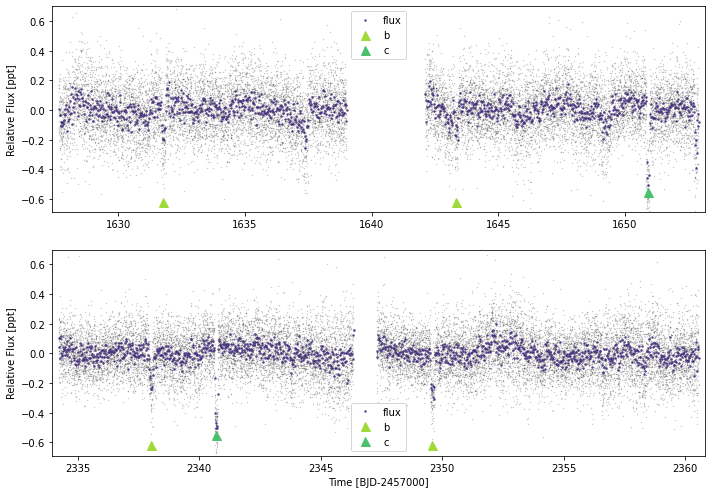

In [14]:
tesslc.plot(plot_rows=2,plot_ephem={'b':{'p':11.57797,'t0':1944.3726,'tdur':3.9/24},
                                    'c':{'p':27.59221,'t0':1954.4099,'tdur':3.2/24}})

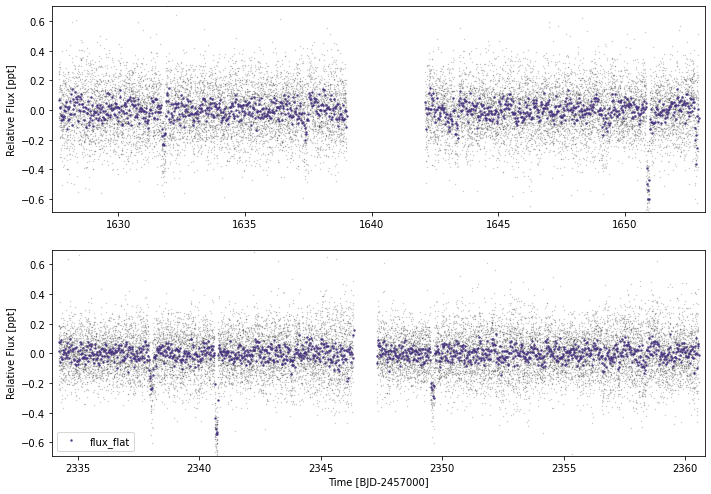

In [16]:
tesslc.flatten(knot_dist=0.6,ephems={'b':{'p':11.57797,'t0':1944.3726,'tdur':3.9/24},
                                    'c':{'p':27.59221,'t0':1954.4099,'tdur':3.2/24}})
tesslc.plot(timeseries=['flux_flat'])

### TESS + K2 Example - K2-167

As the `lightcurve` module cross-checked with other catalogues, it needs and RA & Dec, so unless you specify an RA & Dec along with the initialisation, it goes searching for one from the input catalogue (which can be slow). 

In [63]:
from astropy.coordinates import SkyCoord,FK5
from astropy import units as u

k2lc=lc.multilc(248777106,'k2',radec=SkyCoord("10h18m41.06s +10d07m43.85s",unit=(u.hourangle,u.deg)))

Getting all IDs
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (1): exofop.ipac.caltech.edu:443
DEBUG [urllib3.connectionpool._make_request()]: https://exofop.ipac.caltech.edu:443 "GET /k2/download_target.php?id=248777106 HTTP/1.1" 200 6893
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (1): mast.stsci.edu:443
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "GET /api/v0/invoke?request=%7B%22service%22%3A%20%22Mast.Name.Lookup%22%2C%20%22params%22%3A%20%7B%22input%22%3A%20%22EPIC%20248777106%22%2C%20%22format%22%3A%20%22json%22%7D%7D HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
DEBUG [urllib3.connectionpool._make_request()]: https://mast.stsci.edu:443 "POST /api/v0/invoke HTTP/1.1" 200 None
Sector 48 not (yet) found on MAST | RESPONCE:404
Sector 49 not (yet) found on MAST | RESPONCE:404
INFO  [everest.user.DownloadFile(

We can see which sectors/campaigns (and with which detrending) are loaded using the `cadence_list`:

In [62]:
k2lc.cadence_list

['ts_120_pdc_45', 'ts_120_pdc_46', 'k2_1800_ev_14']

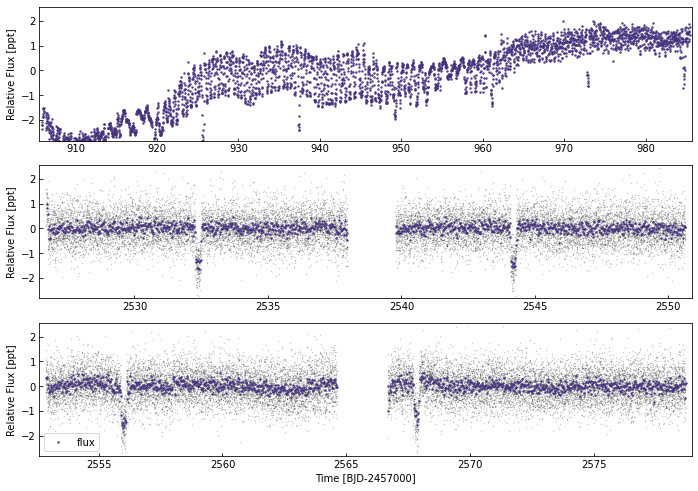

In [61]:
k2lc.plot()

### TESS + Kepler Example - Kepler-25

Once again, we need the KIC (4349452 in this case).

Accessing Kepler data can take a bit more time (as there's 4-years worth!).

In [76]:
keplc=lc.multilc(4349452,'kepler')

Getting all IDs
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 660
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTP connection (1): vizier.u-strasbg.fr:80
DEBUG [urllib3.connectionpool._make_request()]: http://vizier.u-strasbg.fr:80 "POST /viz-bin/votable HTTP/1.1" 200 689


In [77]:
keplc.cadence_list

['ts_120_pdc_14',
 'ts_120_pdc_40',
 'ts_120_pdc_41',
 'k1_1800_pdc_0',
 'k1_1800_pdc_1',
 'k1_59_pdc_2',
 'k1_1800_pdc_3',
 'k1_1800_pdc_4',
 'k1_59_pdc_5',
 'k1_59_pdc_6',
 'k1_59_pdc_7',
 'k1_59_pdc_8',
 'k1_59_pdc_9',
 'k1_59_pdc_10',
 'k1_59_pdc_11',
 'k1_59_pdc_12',
 'k1_59_pdc_13',
 'k1_59_pdc_14',
 'k1_59_pdc_15',
 'k1_59_pdc_16',
 'k1_59_pdc_17']

In [90]:
5703.42004-7000

-1296.57996

Given all this data, plotting will also take some time...

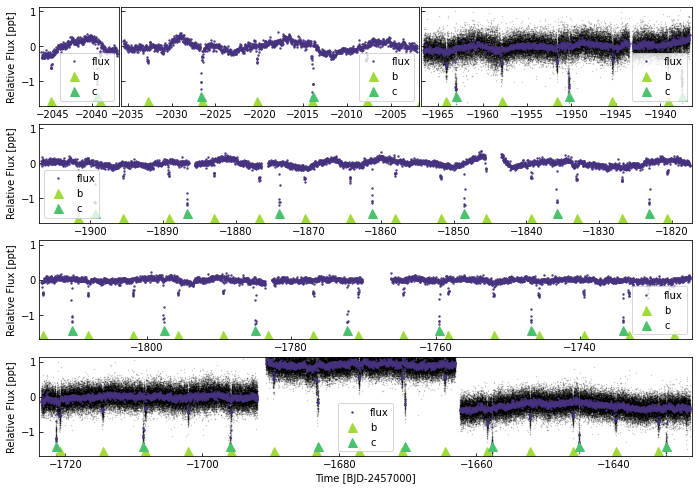

In [91]:
keplc.plot(plot_ephem={'b':{'p':6.2385,'t0':5703.42004-7000,'tdur':0.1},
                            'c':{'p':12.7204,'t0':5711.15013-7000,'dur':0.15}},
           cadences=['k1_1800_pdc_0', 'k1_1800_pdc_1', 'k1_59_pdc_2', 'k1_1800_pdc_3', 'k1_1800_pdc_4', 'k1_59_pdc_5'])

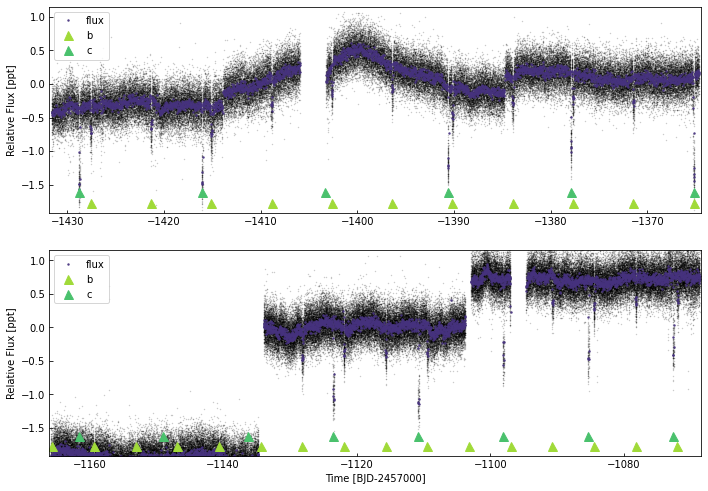

In [92]:
keplc.plot(plot_ephem={'b':{'p':6.2385,'t0':5703.42004-7000,'tdur':0.1},
                       'c':{'p':12.7204,'t0':5711.15013-7000,'dur':0.15}},
           cadences=['k1_1800_pdc_6', 'k1_1800_pdc_7', 'k1_59_pdc_8', 'k1_1800_pdc_9', 'k1_1800_pdc_10', 'k1_59_pdc_11'])

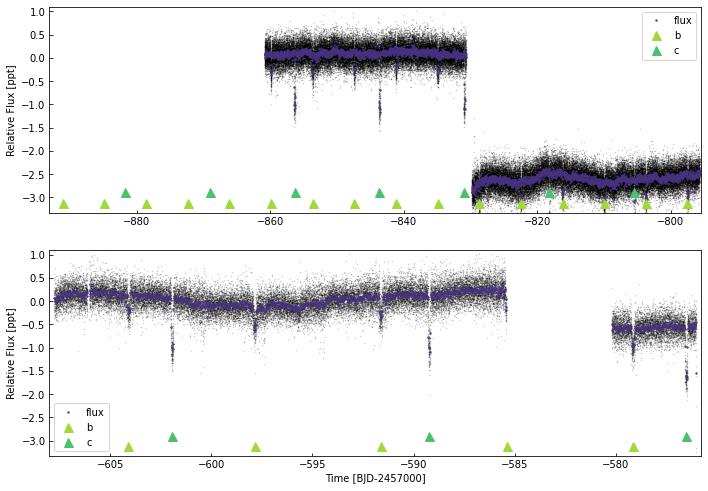

In [93]:
keplc.plot(plot_ephem={'b':{'p':6.2385,'t0':5703.42004-7000,'tdur':0.1},
                       'c':{'p':12.7204,'t0':5711.15013-7000,'dur':0.15}},
           cadences=['k1_1800_pdc_12', 'k1_1800_pdc_13', 'k1_59_pdc_14', 'k1_1800_pdc_15', 'k1_1800_pdc_16', 'k1_59_pdc_17'],)

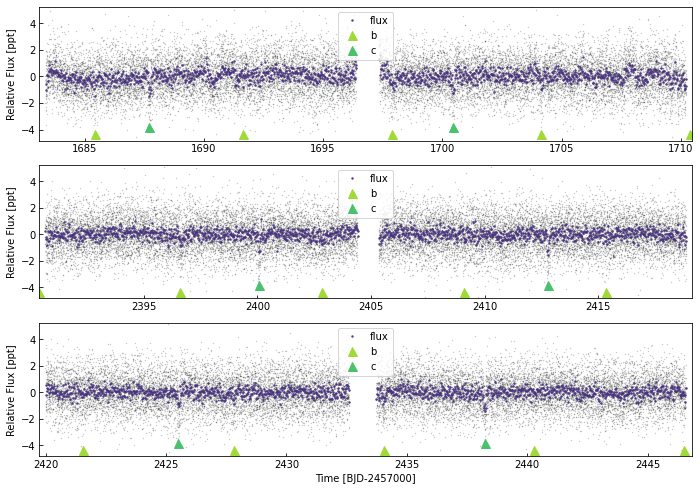

In [94]:
keplc.plot(plot_ephem={'b':{'p':6.2385,'t0':5703.42004-7000,'tdur':0.1},
                       'c':{'p':12.7204,'t0':5711.15013-7000,'dur':0.15}},
           cadences=['ts_120_pdc_14', 'ts_120_pdc_40', 'ts_120_pdc_41'])

## Creating an interactive plot:

We can also create an interactivet plot using the command `interactive_plot`. This creates a bokeh stand-alone html page:

In [20]:
tesslc.interactive_plot(timeseries=['flux','flux_flat'],yoffset=0.8, plot_height=900,overwrite=True,ylim=(-1,2),
                        plot_ephem={'b':{'p':11.57797,'t0':1944.3726,'tdur':3.9/24},
                                    'c':{'p':27.59221,'t0':1954.4099,'tdur':3.2/24}})

binning: ['flux', 'flux_flat']
[nan, nan, nan, 0.0062, 0.0914699, nan, nan, 0.021, 0.03, 0.226, 0.0015675, 110.683, 0.0756251, 0.1, 0.0451056, 0.127035, 0.189496, 0.01985]


## Initialising a simple lightcurve from pre-loaded data

The above lightcurve methods create a `MonoTools.lightcurve.multilc` method. But this inherits the base `MonoTools.lightcurve.lc` class and is built from combinations of individual `lc` objects.

The base class `MonoTools.lightcurve.lc` can also be simply loaded using time/flux/flux_err arrays.

Here's some important info for calling `lc.load_lc()`.

##### The `flx_system` argument
You must specify the "flux system" underlying the lightcurve flux
- `ppm`: normalised lightcurve with median at 0.0 with units in parts per million
- `ppt`: normalised lightcurve with median at 0.0 with units in parts per thousand (this is the default)
- `norm0`: normalised lightcurve with median at 0.0 with units as a ratio (0->1)
- `norm1`: normalised lightcurve with median at 1.0 with units as a ratio (0->1)
- `elec`: un-normalised lightcurve with units of pure electrons where the median is proportional to stellar magnitude

The flux system can be changed using `lc.change_flux_system(new_flx_system)` (and is automatically made uniform when stacking `lc` objects).

##### The `jd_base` argument
As with `flx_system`, we need to know the base system used for the lightcurve time. The default is the TESS system using `jd_base=2457000`

##### The `mission`, `sect` and  `src` arguments
The arguments identify the source of the lightcurve, and are necessary if you plan to stack multiple lightcurves together.
- `mission`: the photometric mission providing the lightcurve in lowercase (e.g. `k2`, `tess`, `kepler`, etc)
- `sect`: the sector, campaign or quarter within that mission the data comes from
- `src`: a identifier for the source of the lightcurve detrending. e.g. `pdc` (most `kepler` quarters), `vand`, `ev` or `pdc` (for `k2` campaigns), `pdc`, `qlp` or `el` (for `tess` sectors) 


Here is a simple example of loading data:

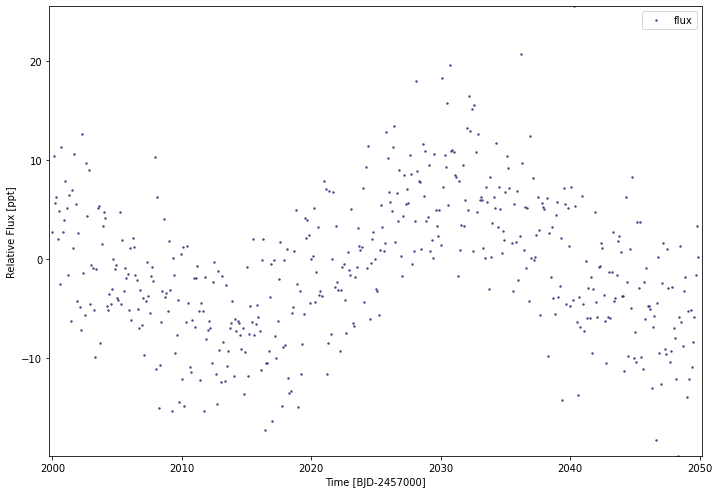

In [94]:
fakeflux=np.random.normal(7*np.sin(np.linspace(-4,5,500)),5,500)
fakeflux[np.random.choice(500,5)]*=5

simplelc1 = lc.lc()
simplelc1.load_lc(time=np.arange(2000,2050,0.1), 
                  fluxes=fakeflux, 
                  flux_errs=np.random.normal(0.01,0.0005,500),
                  flx_system='ppt',jd_base=2457000,
                  mission='tess',sect='99',src='test')
simplelc1.plot()

If we have multiple types of flux (for example, 'raw' and 'detrended' fluxes, background flux, etc) then we can make our input flux and flux_err arguments dictionaries:

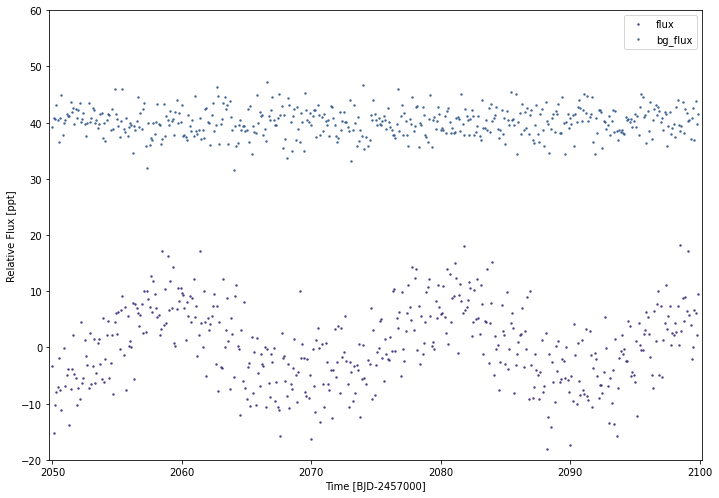

In [79]:
fakeflux2=np.random.normal(7*np.sin(np.linspace(5,20,500)),5,500)
fakeflux2[np.random.choice(500,5)]*=5

simplelc2 = lc.lc()
simplelc2.load_lc(time=np.arange(2050,2100,0.1),
                  fluxes={'flux':fakeflux2,'bg_flux':np.random.normal(40,2.5,500)},
                  flux_errs={'flux_err':np.random.normal(0.01,0.0005,500),'bg_flux_err':np.random.normal(2.5,0.01,500)},
                  flx_system='ppt',jd_base=2457000,
                  mission='tess',sect='100',src='test')

#Plotting both of our flux arrays:
simplelc2.plot(timeseries=['flux','bg_flux'],ylim=(-20,60))

One thing to note is the `cadence` array that is created for these times. This is effectively the unique identifier for the data when stacking lightcurves with the format:

`[telescope ID k1/k2/co/te/ch]_[cadence in secs]_[pipeline source]_[Sector/Q/camp]`

In [8]:
print(simplelc1.cadence[0])

'ts_8600_test_99'

### Masking, binning & flattening

The `lightcurve.lc` class is built to allow quick masking, binning & flattening of the data.


##### Using `lc.make_mask()`
This function calls the `make_fluxmask` function to mask anomalous points.

Some useful arguments when making a mask:
* `flux_arr_name`: Which timeseries of mask
* `cut_all_anom_lim`: The limit in sigma above which we cut all anomalies (default is 5)
* `end_of_orbit`: Whether to mask end-of-orbit flux jumps (often seen in TESS). Default is True
* `use_flat`: Whether to use the flattened flux array to perform masking. Default is False
* `mask_islands`: Whether to mask small "islands" of flux (defined as <0.5d long segments >0.5d from other data). Default is False
* `input_mask` & `in_transit`: Two already-determined masks which allow inclusion of custom masks and make sure in-transit points are not cut.
* `extreme_anom_limit`: An extreme flux limit above/below which we cut points (default:0.25 meaning flux must be >25% median flux & <400%)

In the case of a `multilc` (i.e. a lightcurve stacked from multiple sectors/sources), `make_cadmask` is also called, which masks cadences  in the `lc.mask_cadences` list. This is useful when there are multiple lightcurve sources for the same data (i.e. qlp & pdc), but we only want to consider one as part of the defauly lightcurve as it is higher-quality.

(Note that this is performed by default when accessing a mission lightcurve from `lc.multilc`)

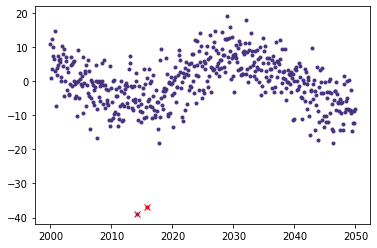

In [37]:
simplelc1.make_mask()

plt.plot(simplelc1.time,simplelc1.flux,'.')
plt.plot(simplelc1.time[~simplelc1.mask],simplelc1.flux[~simplelc1.mask],'xr')

##### Using `lc.flatten()`
This is the in-built flattening function. It has two ways of peforming the flattening which can be selected with the `flattype` argument:
- `bspline` (default): fits smooth splines while iterating away anomalies/transits/etc
- `polystep`: uses out-of-box polynomial fits to smooth data without influencing transit depth

To specify which timeseries to flatten, use the `timeseries` (default is only the `flux` array)

To tweak the flattening function, the `knot_dist`,`maxiter`,`sigmaclip`,`stepsize`, `reflect`, & `polydegree` arguments can be used

`transit_mask` is a key input to the `flattten` function if transits have been identifed in the timeseries, as this masks the transits from being removed.

`lc.flatten()` will add a new timeseries to the `lc` class with the suffix `_flat`, and in both cases, the best-fit splines are saved to `_spline`

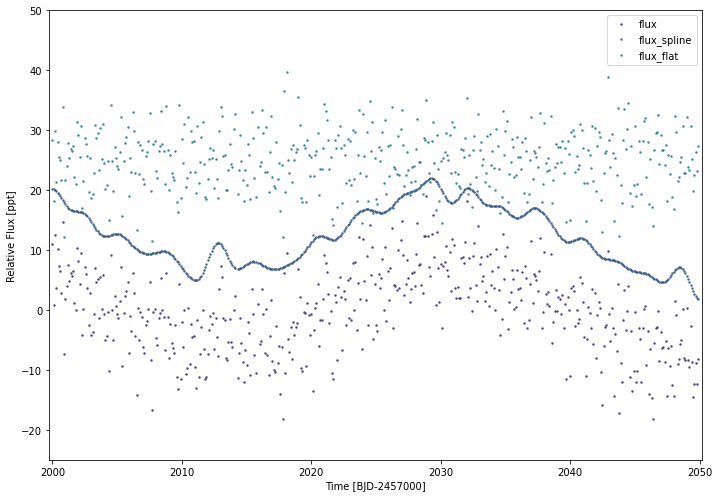

In [48]:
simplelc1.flatten()
simplelc1.plot(timeseries=['flux','flux_spline','flux_flat'],yoffset=12.5,ylim=(-25,50))

##### Using `lc.bin()`
This is the in-built binning function.

Key arguments:
* `timeseries`: As with `plot()` and `flatten()`, you can include the timeseries to be binned
* `binsize`, this determines the size of the bines and defaults to 30mins (e.g. 1/48)
* `use_masked` and `extramask` affect the masks used when binning.

In [61]:
simplelc1.bin(binsize=1.5)

<ErrorbarContainer object of 3 artists>

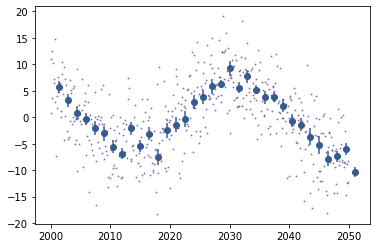

In [63]:
#simplelc1.plot() won't show the bins, as the cadence is too large, so let's go back to a standard plotting:

plt.plot(simplelc1.time[simplelc1.mask],simplelc1.flux[simplelc1.mask],'.',markersize=2,alpha=0.5)
plt.errorbar(simplelc1.bin_time,simplelc1.bin_flux,yerr=simplelc1.bin_flux_err,fmt='o')

## More useful functions


## Stacking `lc` objects

Under the hood of the `multilc` class is the ability to stack `lc` objects.

This is done by making a new `multilc` object (which can be empty) and calling `multilc.stack([newlcs])` with a list of `lc` objects as arguments. For example:

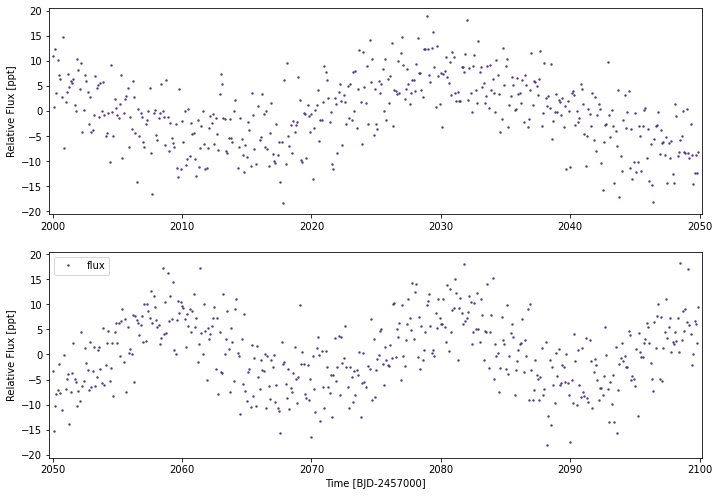

In [80]:
testlc = lc.multilc(123456789,'tess',do_search=False) #we need do_search =False here, as we don't actually want to search for other lightcurves for the star TIC123456789
testlc.stack([simplelc1,simplelc2])
testlc.plot(savepng=False)

## Saving

Lightcurves are saved, by default, in the same ID-specific folder that other `MonoTools` modules access, and which can be modified using the `$MONOTOOLSPATH` system environment variable but is by default in the `MonoTools/data` path. So, in this case, it would be in the `MonoTools/data/TIC00123456789/` folder.

There are two ways to save the lightcurves found by `lc` and `multilc`:

##### 1) As a pickled object.

This retainins most metadata, although we delete binned and flattened arrays (which are re-derivable from the other timeseries).

In [ ]:
tools.MonoData_savepath

In [87]:
testlc.save()

##### 2) As a csv.

This does not retain metadata and only stores those timeseries with the same length as the time array (i.e. time, fluxes, flux_errs, cadence, mask, etc):

In [88]:
testlc.save_csv()

In [93]:
#Let's see what got stored:
import pandas as pd
import os
from MonoTools.MonoTools import tools

df=pd.read_csv(os.path.join(tools.MonoData_savepath,"TIC00123456789","TIC00123456789_lc.csv"),index_col=0)
df

,bg_flux,bg_flux_err,cadence,flux,flux_err,flux_mask,flux_spline,mask,time
0,NaN,NaN,ts_8600_test_99,11.022208,0.010108,True,7.669597,True,2459000.0
1,NaN,NaN,ts_8600_test_99,0.809182,0.009523,True,7.631497,True,2459000.1
2,NaN,NaN,ts_8600_test_99,12.440341,0.010081,True,7.514247,True,2459000.2
3,NaN,NaN,ts_8600_test_99,3.618393,0.008787,True,7.329670,True,2459000.3
4,NaN,NaN,ts_8600_test_99,10.173530,0.010226,True,7.089586,True,2459000.4
...,...,...,...,...,...,...,...,...,...
995,42.598741,2.515070,ts_8600_test_100,0.064905,0.009867,True,NaN,True,2459099.5
996,36.871784,2.505943,ts_8600_test_100,6.688908,0.009028,True,NaN,True,2459099.6
997,43.892122,2.487309,ts_8600_test_100,6.159992,0.010139,True,NaN,True,2459099.7
998,39.806309,2.503166,ts_8600_test_100,2.217753,0.010212,True,NaN,True,2459099.8


## Loading

If you have already called `multilc` with a given `id`/`mission` pair, then the data is usually automatically stored in the MonoTools datapath. The next time you call `multilc`, it will check this path for existing data and load it using `multilc.load_pickle()`. This can occasionally cause bugs, so often it's good to check if `load=False` fixes problems with initialising `multilc` objects.